In [1]:
"""
Landon Buell
Marek Petrik
CS 750.01
26 Feb 2020
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Problem 1 [25%] 
### It is mentioned in Chapter 7 of ISL that a cubic regression spline with one knot at ξ can be obtained using a basis of the form $x$, $x^2$, $x^3$, $[x−\xi]^3_+$, where $[x−\xi]^3_+ = (x−\xi)^3$ if $x > \xi$ and equals 0 otherwise. We will now show that a function of the form 
$$f(x) = \beta_0 + \beta_1x + \beta_2x^2 +\beta_3x^3 + \beta_4[x−\xi]^3_+ $$

### is indeed a cubic regression spline, regardless of the values of $\beta_0$,$\beta_1$,$\beta_2$, $\beta_3$,$\beta_4$. 


#### 1. Find a cubic polynomial
$$ f_1(x)= a_1 +b_1x + c_1x^2 +d_1x^3 $$ 
#### such that $f(x)= f_1(x)$ for all $x \leq \xi$. Express $a_1$,$b_1$,$c_1$,$d_1$ in terms of $\beta_0$,$\beta_1$,$\beta_2$, $\beta_3$,$\beta_4$.. 

The values of each coefficient are found from the corresponding order of the polynomial. Thus: 
$$ a_1 = \beta_0 , b_1 = \beta_1 , c_1 = \beta_2, d_1 = \beta_3 $$ 


#### 2. Find a cubic polynomial
$$f_2(x)= a_2 +b_2x+c_2x^2 +d_2x^3 $$
#### such that $f(x) = f_2(x)$ for all $x > \xi$. Express $a_2$,$b_2$,$c_2$,$d_2$ in terms of $\beta_0$,$\beta_1$,$\beta_2$, $\beta_3$,$\beta_4$. We have now established that $f(x)$ is a piecewise polynomial. 

We can expand the $\beta_4$ term to show that: $[x - \xi]^3 = x^3 - \xi^3 +3x\xi^2 - 3x^2\xi $
Thus we can show that:
$$ d_2 = (\beta_3 + \beta_4) $$
$$ c_2 = (\beta_2 - 3\beta_4\xi) $$
$$ b_2 = (\beta_1 + 3\beta_4\xi^2) $$
$$ a_2 = (\beta_0 -\beta_4\xi^3) $$
This the function $f_2(x)$ is defined:
$$ f_2(x) = (\beta_0 -\beta_4\xi^3) +  (\beta_1 + 3\beta_4\xi^2)x + (\beta_2 - 3\beta_4\xi)x^2 + (\beta_3 + \beta_4)x^3 $$

### 3. Show that $f_1(\xi) = f_2(\xi)$. That is, $f(x)$ is continuous at $\xi$. 
We can evaluate both functions at $x = \xi$ , which forces the evauation of $[x - \xi]^3$ to go to zero, thus both functions meet where $x = \xi$, and allows the polynomail to be both peice-wise defined as well as continuous over the interval of interest.

# Problem 2 [25%] 
### Use linear, cubic, and natural regression splines investigated Chapter 7 of ISL to the "Auto" data set. Is there evidence for non-linear relationships in this data set? Create some informative plots to justify your answer. 

In [2]:
# Loading in the auto data csv file in a pandas DataFrame object
autodata = pd.read_csv('auto.csv',na_values='?')
autodata = autodata.dropna()
autodata = autodata.sort_values(by=['mpg'])

# Print header of the frame
print(autodata.head(10))

mpg = autodata['mpg'].to_numpy()
hpr = autodata['horsepower'].to_numpy()

""" Please note: This silution has been modifed from Andrew Jones : 'Creating Cubic Splines in Python'
https://www.analytics-link.com/post/2018/08/17/creating-and-plotting-cubic-splines-in-python """



      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
28    9.0          8         304.0       193.0    4732          18.5    70   
26   10.0          8         307.0       200.0    4376          15.0    70   
25   10.0          8         360.0       215.0    4615          14.0    70   
27   11.0          8         318.0       210.0    4382          13.5    70   
124  11.0          8         350.0       180.0    3664          11.0    73   
103  11.0          8         400.0       150.0    4997          14.0    73   
67   11.0          8         429.0       208.0    4633          11.0    72   
104  12.0          8         400.0       167.0    4906          12.5    73   
69   12.0          8         350.0       160.0    4456          13.5    72   
42   12.0          8         383.0       180.0    4955          11.5    71   

     origin                        name  
28        1                    hi 1200d  
26        1                   chevy c20  
25        1    

" Please note: This silution has been modifed from Andrew Jones : 'Creating Cubic Splines in Python'\nhttps://www.analytics-link.com/post/2018/08/17/creating-and-plotting-cubic-splines-in-python "

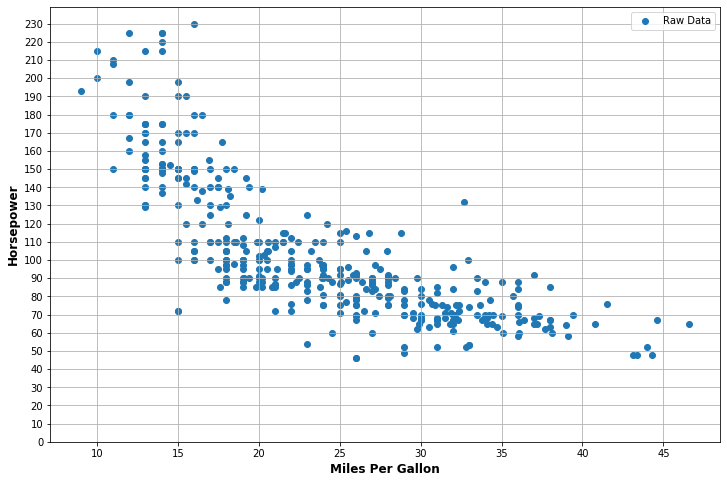

In [10]:
plt.figure(figsize=(12,8))
plt.xlabel("Miles Per Gallon",size=12,weight='bold')
plt.ylabel("Horsepower",size=12,weight='bold')
plt.scatter(mpg,hpr,label='Raw Data')
plt.legend()
plt.yticks(np.arange(0,240,10))
plt.grid()
plt.show()

In [4]:
""" Linear Spline """
import scipy.interpolate as interp


In [8]:
""" Cubic Spline """

# make cubic spline w/ mpg,horsepower
xaxis = np.arange(0,len(mpg),1)
cubic_spline = interp.CubicSpline(x=xaxis,y=hpr,axis=0,
                                 bc_type='natural')
print(type(cubic_spline))

<class 'scipy.interpolate._cubic.CubicSpline'>


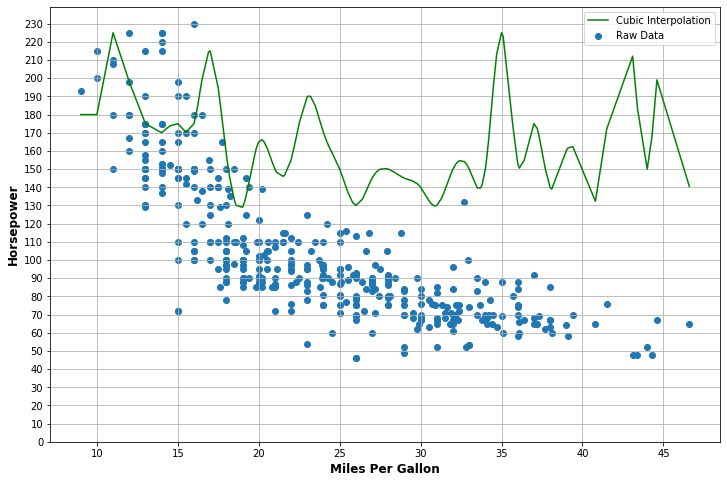

' I seemed to have messed up quite badly here! '

In [15]:
plt.figure(figsize=(12,8))
plt.xlabel("Miles Per Gallon",size=12,weight='bold')
plt.ylabel("Horsepower",size=12,weight='bold')
plt.scatter(mpg,hpr,label='Raw Data')
plt.plot(mpg,cubic_spline(mpg),color='green',
        label='Cubic Interpolation')
plt.legend()
plt.yticks(np.arange(0,240,10))
plt.grid()
plt.show()

""" I seemed to have messed up quite badly here! """

# Problem 3 [25%] 
### You will now derive the Bayesian connection to the lasso as discussed in Section 6.2.2. of ISL.

#### 1. Suppose that $y_i = \beta_0 +\sum_{j=1}^{p} x_{ij}\beta_j + \epsilon_i$ where $\epsilon_1 , ... , \epsilon_n $ are independent and identically distributed from a normal distribution $N(0,1)$. Write out the likelihood for the data as a function of values $\beta$.

Likihood function is given in ISL, eqn. (4.5):
$$ l(\beta_0,\beta_1) = \prod_{i:y_i=1}p(x_i) \prod_{i':y_{i'}=0}(1-p(x_{i'})) $$

The Gaussian given by $N(0,1)$ can be functionlly written out:
$$N(0,1) = p(x) = \frac{1}{\sqrt{2\pi}}e^{\frac{x^2}{2}}$$  

Thus we can re-write the likihood function for the Gaussian as:
$$ \frac{1}{\sqrt{(2\pi)}}\prod_{i=0}^{n}e^{-\frac{\epsilon^2_i}{2}} $$

Where $\epsilon_i$ is given by: $y_i - \beta_0 +\sum_{j=1}^{p} x_{ij}\beta_j$ from above

#### 2. Assume the following prior for $\beta$ : $\beta_1 , ... ,\beta_p$  are independent and identically distributed according to a normal distribution with $\mu = 0$  and $\sigma^2 = c$  Write out the posterior for $\beta$ in this setting using Bayes theorem.

The equation for our gaussian then take:
$$N(0,c) = \frac{1}{\sqrt{2\pi c}}e^{\frac{x^2}{2c}}$$

From Bayes' Theorem, Let $\beta$ be the set of predictors, and $y$ (just like in pt. 1) be a data set:
$$P(\beta|y) = \frac{P(\beta)}{P(y)}P(y|\beta)$$

The value $P(y|\beta)$ is then given by the liklihood function as above:
$$P(y|\beta) = \frac{1}{\sqrt{(2\pi c)}}\prod_{i=0}^{n}e^{-\frac{(y_i - \beta_0 +\sum_{j=1}^{p} x_{ij}\beta_j)^2_i}{2c}} $$

Similarly, then $P(\beta)$ is given by the simplier Gaussiuan, given $\beta$:
$$P(\beta) = \frac{1}{\sqrt{(2\pi c)}}\prod_{i=0}^{n}e^{-\frac{(y_i - \beta_0 +\sum_{j=1}^{p} x_{ij}\beta_j)^2_i}{2c}} $$

We can then combine these to show $P(y|\beta)$:
$$ P(y|\beta) = \frac{1}{P(y)} \frac{1}{\sqrt{(2\pi c)}}
\Big[ \prod_{i=0}^{n}e^{-\frac{(y_i - \beta_0 +\sum_{j=1}^{p} x_{ij}\beta_j)^2_i}{2c}} \Big]
\Big[ \prod_{i=0}^{n}e^{-\frac{\beta^2_i}{2c}} \Big] $$

#### 3. Argue that the lasso estimate is the value of $\beta$ with maximal probability under this posterior distribution. Compute log of the probability in order to make this point. Hint: The denominator (= the probability of data) can be ignored in computing the maximum probability.

Computing in the natural log of the probability, $P(y|\beta)$, we get something that strongly resembles the Lasso Regression Defintion:
$$ \log\big(P(y|\beta)\big) = 
    \frac{1}{2c}\Big[ \sum_{i=1}^{n}(y_i - \beta_0 +\sum_{j=1}^{p} x_{ij}\beta_j) - \sum_{j=1}^{\beta}\beta_j^2 \Big] $$
    
(I seem to have made a math error somewhere along the lines here!)

#### 4. Suppose that $\epsilon_1 , ... , \epsilon_n $ are independent and identically distributed according to the Laplace distribution. What are the maximum likelihood/MAP estimates of $\beta_i$ under this assumption? 
#### Hint: See https: //en.wikipedia.org/wiki/Least_absolute_deviations

# Problem 4 [25%] 
### Based on a true story, according to: The Drunkard’s Walk: How Randomness Rules Our Lives, Leonard Mlodinow Suppose that you applied for a life insurance and underwent a physical exam. The bad news is that your application was rejected because you tested positive for HIV. The test’s sensitivity is 99.7% and speciﬁcity is 98.5% 
#### [https://en.wikipedia.org/wiki/Diagnosis_of_HIV/AIDS#Accuracy_of_HIV_testing]. 
### However, after studying the CDC website, you ﬁnd that in your ethnic group (age, gender, race, ...) only one in 10,000 people is infected. What is the probability that you actually have HIV?


Sensitivity:
$$ Sens = \frac{TP}{TP+FN} $$
Specificity:
$$ Spec = \frac{TN}{TN + FP} $$

Sensitivity the ratio of correct diagnoses to the total revelent cases. It is the case of how many correct idenfications that there are. Thus, this score tells me that the test has a 99.7% chance of correctly identifying a case. Specificity is the ratio of correct passes to the total number of passes of the test. This score tells me that the test has a 98.5% chance of correctly identifying not having a case correctly.

To solve this, we can use Bayes theorem that states for a hypothesis, "H" and evidence, "E"

$$ P(H|E) = \frac{P(E|H)}{P(E)}P(H) $$

In our case, we can replace "H" with "Not carrying a disease" and "E" with a "Positive screening" Thus Bayes' Theorem now reads:

$$ P(no disease | screen positive) = \frac{P(screen positive | no disease)}{P(screen positve)}P(no disease) $$

Which tells us the probability of not having a disease given a positive screening. We can fill in the specific values as given in the problem:
$$P(screen positive | no disease) = 98.5 (specificity)$$
$$P(screen positive) = 99.7 (sensitivity) $$
$$P(no disease) = 9,999/10,000$$

In [3]:
P_screen_pos = 99.7
P_pos_no_dis = 98.5
P_no_disease = 9999/10000
P_no_dis_pos = (P_pos_no_dis/P_screen_pos)*P_no_disease
print("Possibility of Having N0 Disease:")
print(P_no_dis_pos*100,'%')

Possibility of Having No Disease:
98.78650952858575 %


Thus from the calculation above, I have about a 1.2135% chance of having HIV given the test results.